In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'yfinance'

In [26]:

stock1 = 'MSFT'
stock = stock1
data = yf.download(stock
                   ,start="2020-01-01"
                  )
data['TP'] = (data['High'] + data['Low'] + data['Close'])/3
data = data['TP']

[*********************100%***********************]  1 of 1 completed


In [27]:
data

Date
2020-01-02    159.893331
2020-01-03    158.876663
2020-01-06    158.213333
2020-01-07    158.190002
2020-01-08    159.613332
                 ...    
2023-01-05    223.873332
2023-01-06    223.346664
2023-01-09    228.256668
2023-01-10    229.163335
2023-01-11    234.276667
Name: TP, Length: 763, dtype: float64

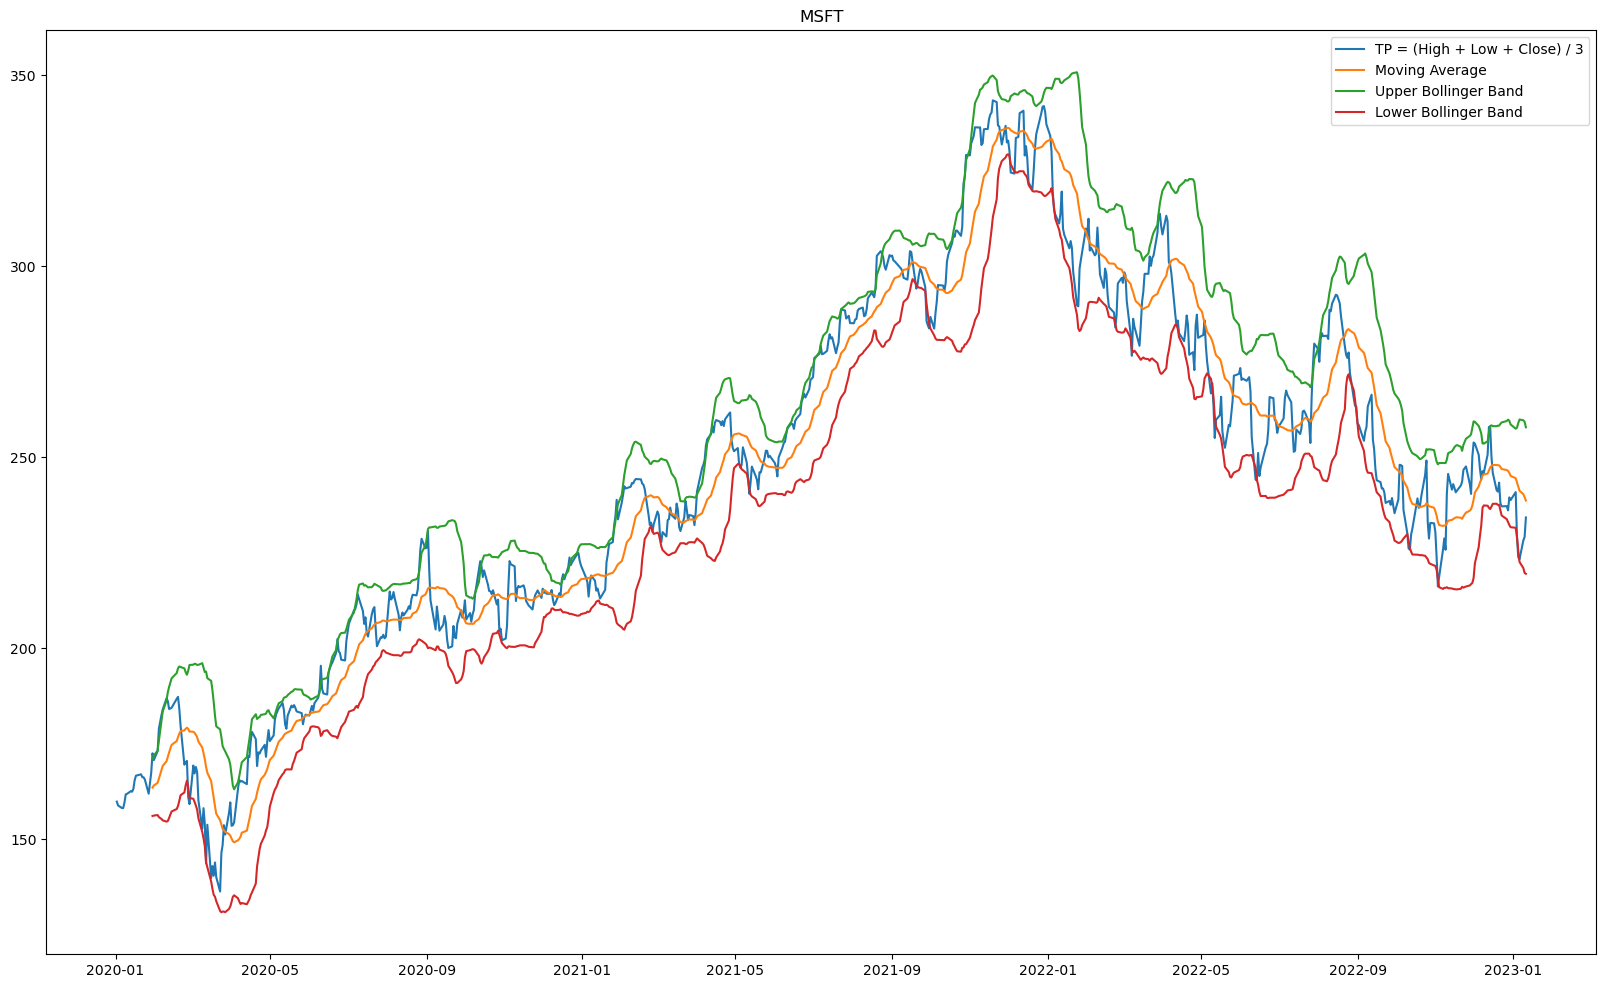

In [34]:
n = 20
m = 2
MA = data.rolling(n).mean()
sig = data.rolling(n).std()
bolu = MA + m * sig
bold = MA - m * sig



plt.figure(figsize = (20,12))
plt.plot(data, label = 'TP = (High + Low + Close) / 3')
plt.plot(MA, label = 'Moving Average')
plt.plot(bolu, label = 'Upper Bollinger Band')
plt.plot(bold, label = 'Lower Bollinger Band')
plt.legend()
plt.title(stock1)
plt.show()

In [43]:
df = pd.DataFrame({
    'TP': data,
    'bolu': bolu,
    'bold': bold
    
})
df = df.dropna()
df = df.reset_index()
df

,Date,TP,bolu,bold
0,2020-01-30,172.539998,170.964573,156.132759
1,2020-01-31,170.736664,171.953555,156.228110
2,2020-02-03,173.093333,173.229792,156.373541
3,2020-02-04,179.023331,175.838007,155.846325
4,2020-02-05,180.836665,178.355377,155.593622
...,...,...,...,...
739,2023-01-05,223.873332,258.968321,225.677013
740,2023-01-06,223.346664,259.919249,222.636084
741,2023-01-09,228.256668,259.715103,221.025896
742,2023-01-10,229.163335,259.306742,219.754258


In [57]:
df.index 

RangeIndex(start=0, stop=744, step=1)

In [71]:
cash = 1000
stocksowned = 1

def buy(cash, stockprice):
    if cash > stockprice:
        cash = cash - stockprice
        return cash, 1
    else:
        print('No funds')
        return cash, 0
def sell(cash, stockprice, stocksowned):
    if stocksowned > 0:
        cash = cash + stockprice
        return cash, -1
    else: 
        print('Nothing to sell')
        return cash, 0

for i in df.index + 1:
    if (df.iloc[i]['TP'] >= df.iloc[i]['bolu']) & (df.iloc[i-1]['TP'] < df.iloc[i]['bolu']):
        print('Sell ' + str(df.iloc[i]['Date']))
        cash = sell(cash, df.iloc[i]['TP'], stocksowned)[0]
        stocksowned += sell(cash, df.iloc[i]['TP'], stocksowned)[1]  
        print('Cash: ' + str(cash))
        print('Stocks Owned: ' +str(stocksowned))
        print('Total Value: ' + str(stocksowned* df.iloc[i]['TP'] + cash))
        print('')
        
    elif (df.iloc[i]['TP'] <= df.iloc[i]['bold']) & (df.iloc[i-1]['TP'] > df.iloc[i]['bold']):
        print('Buy ' + str(df.iloc[i]['Date']))
        cash = buy(cash, df.iloc[i]['TP'])[0]
        stocksowned += buy(cash, df.iloc[i]['TP'])[1]
        print('Cash: ' + str(cash))
        print('Stocks Owned: ' +str(stocksowned))
        print('Total Value: ' + str(stocksowned* df.iloc[i]['TP'] + cash))
        print('')

Sell 2020-02-04 00:00:00
Cash: 1179.0233306884766
Stocks Owned: 0
Total Value: 1179.0233306884766

Sell 2020-02-06 00:00:00
Nothing to sell
Nothing to sell
Cash: 1179.0233306884766
Stocks Owned: 0
Total Value: 1179.0233306884766

Sell 2020-02-07 00:00:00
Nothing to sell
Nothing to sell
Cash: 1179.0233306884766
Stocks Owned: 0
Total Value: 1179.0233306884766

Sell 2020-02-10 00:00:00
Nothing to sell
Nothing to sell
Cash: 1179.0233306884766
Stocks Owned: 0
Total Value: 1179.0233306884766

Buy 2020-02-27 00:00:00
Cash: 1017.9600016276041
Stocks Owned: 1
Total Value: 1179.0233306884766

Buy 2020-02-28 00:00:00
Cash: 858.7200012207031
Stocks Owned: 2
Total Value: 1177.2000020345051

Buy 2020-03-12 00:00:00
Cash: 715.0166676839193
Stocks Owned: 3
Total Value: 1146.126668294271

Sell 2020-06-09 00:00:00
Cash: 904.269999186198
Stocks Owned: 2
Total Value: 1282.7766621907554

Sell 2020-06-10 00:00:00
Cash: 1099.7266642252605
Stocks Owned: 1
Total Value: 1295.183329264323

Sell 2020-06-23 00:00:

IndexError: single positional indexer is out-of-bounds

In [51]:
df.loc[1]

Date    2020-01-31 00:00:00
TP               170.736664
bolu             171.953555
bold              156.22811
Name: 1, dtype: object

In [30]:
df[df['TP'] > df['bolu']]

,TP,bolu,bold
Date,,,
2020-01-30,172.539998,170.964573,156.132759
2020-02-04,179.023331,175.838007,155.846325
2020-02-05,180.836665,178.355377,155.593622
2020-02-06,182.503337,180.900575,155.337424
2020-02-07,184.000000,183.471067,154.988932
2020-02-10,186.929998,186.320840,154.640826
2020-06-09,189.253332,188.428432,178.852235
2020-06-10,195.456665,191.350572,177.080763
2020-06-23,202.429998,201.922358,176.477977


In [32]:
df[df['TP'] < df['bold']]

,TP,bolu,bold
Date,,,
2020-02-27,161.063329,194.149710,163.676622
2020-02-28,159.240000,195.661379,160.834953
2020-03-12,143.703334,193.941841,144.029157
2021-02-25,230.486669,248.815208,230.882456
2021-05-04,248.253332,264.186247,248.310420
2021-05-05,247.263336,264.505930,247.783070
2021-05-12,240.483337,266.284018,241.642650
2021-09-20,294.179993,306.154210,295.338123
2021-09-28,285.683329,307.149484,290.291849
